In [200]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Flatten, Reshape
import keras.datasets
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# Fitting a non-linear function

In [ ]:
n=1000
x=np.random.uniform(-6,6,n).reshape(-1,1)
# generate Y as cosine of x.
y=np.cos(x)+np.random.normal(0,.5,n).reshape(-1,1)
train_idx=list(range(0,int(.9*n)))
test_idx=list(range(int(.9*n),n))

In [ ]:
K.clear_session()


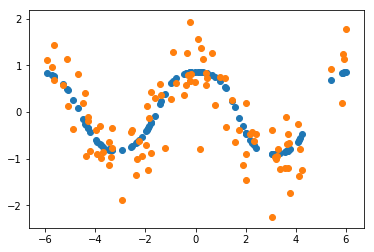

In [82]:


K.clear_session()

mod=Sequential()
mod.add(Dense(10,activation='tanh',input_shape=(1,)))
mod.add(Dense(10,activation='tanh'))
mod.add(Dense(1,activation='tanh'))
mod.compile('adam',loss='mse',metrics=['mae'])
mod.fit(x[train_idx,:],y[train_idx],epochs=200,verbose=0)
yhat=mod.predict(x[test_idx])
plt.scatter(x[test_idx],yhat)
plt.scatter(x[test_idx],y[test_idx])
plt.show()

# Image parsing --  convolutional Model

In [151]:
# digits=datasets.load_digits()

n=len(digits['data'])
train_idx=list(range(0,int(.9*n)))
test_idx=list(range(int(.9*n),n))


x=digits['data']
y=keras.utils.to_categorical(digits['target'],10)

mod=Sequential()
mod.add(Reshape(target_shape=(8,8,1),input_shape=(64,)))
mod.add(Conv2D(3,(4,4)),)
mod.add(Flatten())
mod.add(Dense(10,activation='softmax'))

mod.compile('adam','categorical_crossentropy')
mod.fit(x[train_idx],y[train_idx],epochs=200,verbose=0)
yhat=np.argmax(mod.predict(x[test_idx]),1)

metrics.accuracy_score(np.argmax(y[test_idx],1),yhat)


0.92222222222222228

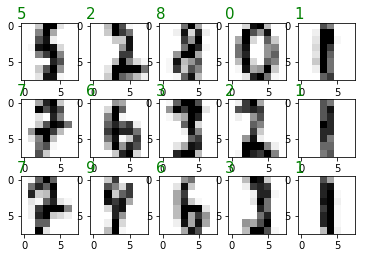

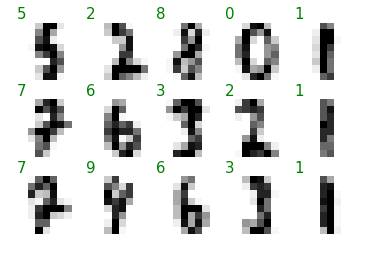

In [199]:
fig,ax=plt.subplots(3,5)
ax=ax.reshape(-1)
for i in range(15):
    ax[i].imshow(x[test_idx][i,:].reshape(8,8),cmap='Greys')
    ax[i].text(-1,-1,yhat[i],color='green', fontsize=15)
    ax[i].axis('off')
plt.show()
